<a href="https://colab.research.google.com/github/aisha-colab/Machine-learning-models/blob/main/new2DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [6]:
local_zip = '/content/drive/MyDrive/airlab.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf

In [8]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [10]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
#from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

ImportError: ignored

In [17]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import splitfolders
input_folder = '/content/airlab/2DS_rospla'

splitfolders.ratio(input_folder, output='2DS_rospla', seed=42, ratio=(.7, .2, .1), group_prefix=None)


Copying files: 4190 files [00:00, 9271.80 files/s]


In [11]:
#Import Libraries

import sys
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
#from keras.optimizers import Adam
import itertools  

In [12]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [14]:
local_zip = '/content/drive/MyDrive/airlab.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_data_path = '/content/2DS_rospla/train'
valid_data_path = '/content/2DS_rospla/val'
test_data_path = '/content/2DS_rospla/test'

In [20]:
train_datagen = ImageDataGenerator(zoom_range=0.5)
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical', shuffle=True)

valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                    target_size=(224, 224),
                                                    batch_size=224,
                                                    class_mode='categorical', shuffle=True)

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_data_path,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical', shuffle=False)



Found 2858 images belonging to 7 classes.
Found 821 images belonging to 7 classes.
Found 421 images belonging to 7 classes.


In [21]:
# Function for plots images with labels within jupyter notebook

def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1

    for i in range(len(ims)):
        sp = f.add_subplot(cols, rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')


In [22]:
#Check the training set (with batch of 10 as defined above
imgs, labels = next(train_generator)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


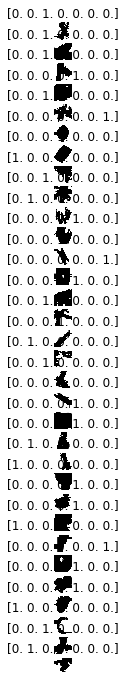

In [23]:
#Images are shown in the output
plots(imgs, titles=labels)

In [55]:
#Images Classes with index
print(train_generator.class_indices)


{'2D-S Other (OT)': 0, 'Aggregate (AG)': 1, 'Bullet Rosette (BR)': 2, 'Columnar Crystal (CC)': 3, 'Compact particle (CP)': 4, 'Planar crystal (PC)': 5, 'Quasi-sphere (QS)': 6}


In [56]:
model = Sequential([Conv2D(128, (3, 3), activation='relu', 
                           input_shape=(224, 224, 3)), 
                    Flatten(), 
                    Dense(7, activation='softmax')
                   ])


In [57]:
#Get summary of the model
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 flatten_5 (Flatten)         (None, 6308352)           0         
                                                                 
 dense_6 (Dense)             (None, 7)                 44158471  
                                                                 
Total params: 44,162,055
Trainable params: 44,162,055
Non-trainable params: 0
_________________________________________________________________


In [58]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [59]:
#Train the model
history = model.fit_generator(train_generator,  validation_data=valid_generator, validation_steps=4, epochs=5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
90/90 [==============================] - ETA: 0s - loss: 3664.1365 - accuracy: 0.3968

ResourceExhaustedError: ignored

In [29]:
#Get the accuracy score
test_score = model.evaluate_generator(test_generator, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 59.86%
[INFO] Loss:  21.302248001098633


Text(0.5, 1.0, 'Loss Curves')

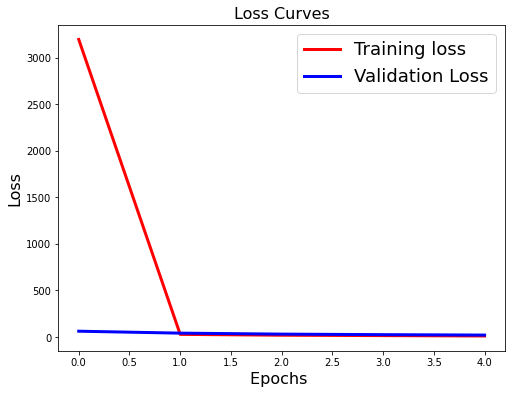

In [30]:
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  

Text(0.5, 1.0, 'Accuracy Curves')

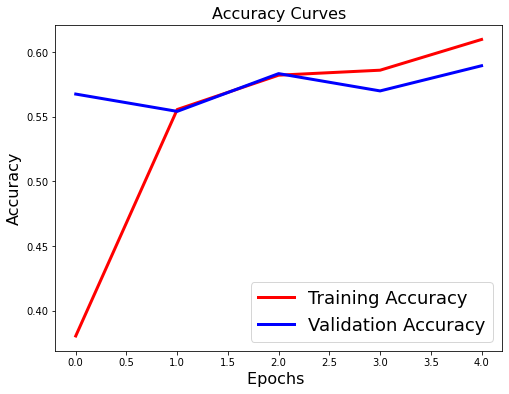

In [31]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [32]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###################################################

In [33]:
#Print the Target names

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Normalized confusion matrix


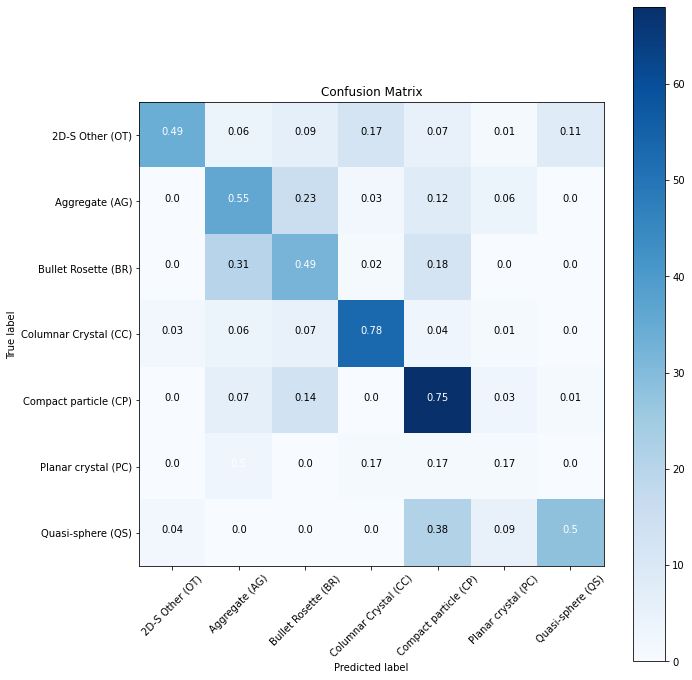

In [34]:
#Confution Matrix 

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [35]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       0.89      0.49      0.63        70
       Aggregate (AG)       0.49      0.55      0.52        65
  Bullet Rosette (BR)       0.45      0.49      0.47        65
Columnar Crystal (CC)       0.77      0.78      0.77        68
Compact particle (CP)       0.58      0.75      0.65        91
  Planar crystal (PC)       0.07      0.17      0.10         6
    Quasi-sphere (QS)       0.76      0.50      0.60        56

             accuracy                           0.60       421
            macro avg       0.57      0.53      0.53       421
         weighted avg       0.64      0.60      0.60       421



In [76]:
#Save the model
model.save("2DS.hdf5")

In [60]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [61]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [62]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [63]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [65]:
prediction = Dense(7, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [66]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [67]:
#Train the model
history = model.fit_generator(train_generator, steps_per_epoch=5, validation_data=valid_generator, validation_steps=4, epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
5/5 [==============================] - 167s 10s/step - loss: 13.1248 - accuracy: 0.3250 - val_loss: 9.0304 - val_accuracy: 0.6054
Epoch 2/10
5/5 [==============================] - 7s 2s/step - loss: 6.9541 - accuracy: 0.6125 - val_loss: 4.9598 - val_accuracy: 0.7467
Epoch 3/10
5/5 [==============================] - 7s 1s/step - loss: 8.7676 - accuracy: 0.6562 - val_loss: 7.1545 - val_accuracy: 0.7223
Epoch 4/10
5/5 [==============================] - 6s 1s/step - loss: 6.3720 - accuracy: 0.7188 - val_loss: 8.9877 - val_accuracy: 0.7393
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 5.3006 - accuracy: 0.7875 - val_loss: 7.6603 - val_accuracy: 0.7637
Epoch 6/10
5/5 [==============================] - 6s 1s/step - loss: 6.7347 - accuracy: 0.7437 - val_loss: 7.5811 - val_accuracy: 0.7844
Epoch 7/10
5/5 [==============================] - 6s 1s/step - loss: 7.8273 - accuracy: 0.7125 - val_loss: 5.7546 - val_accuracy: 0.8100
Epoch 8/10
5/5 [=====================

In [68]:
#Get the accuracy score
test_score = model.evaluate_generator(test_generator, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 77.43%
[INFO] Loss:  7.010769844055176


Text(0.5, 1.0, 'Loss Curves')

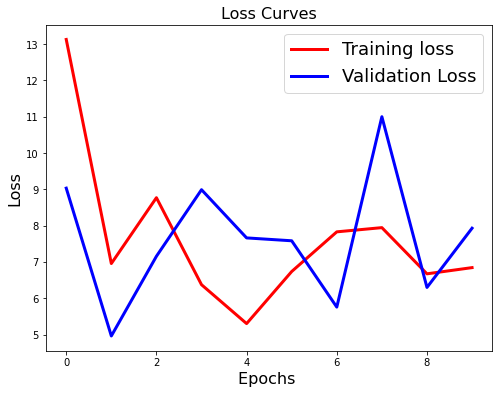

In [69]:
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  

Text(0.5, 1.0, 'Accuracy Curves')

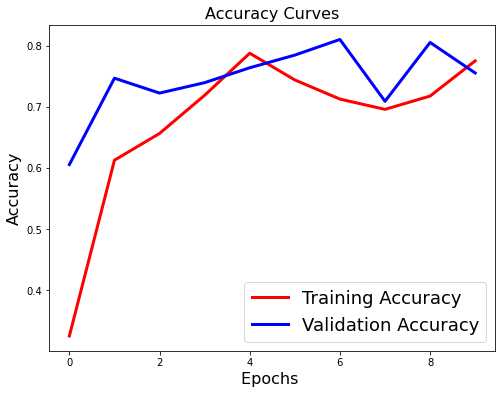

In [70]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



In [71]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [72]:
#Print the Target names

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Normalized confusion matrix


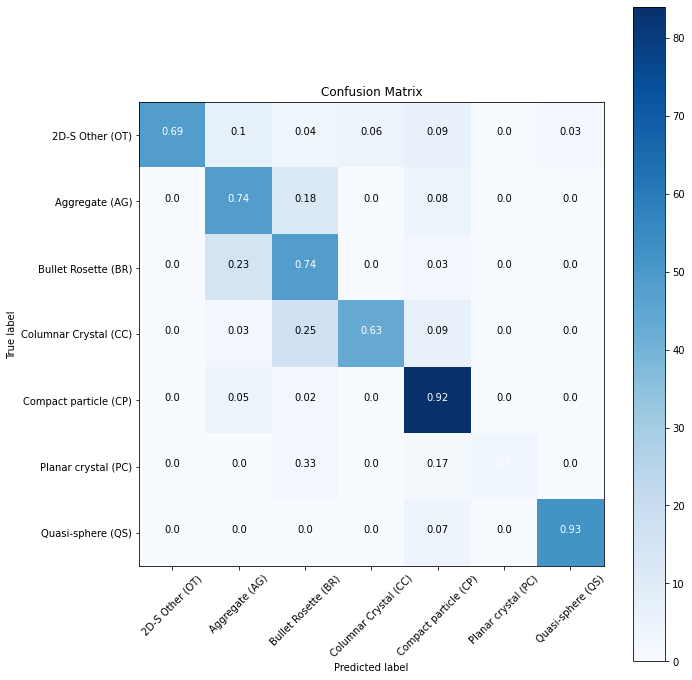

In [73]:
#Confution Matrix 

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [74]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       1.00      0.69      0.81        70
       Aggregate (AG)       0.62      0.74      0.68        65
  Bullet Rosette (BR)       0.57      0.74      0.64        65
Columnar Crystal (CC)       0.91      0.63      0.75        68
Compact particle (CP)       0.78      0.92      0.84        91
  Planar crystal (PC)       1.00      0.50      0.67         6
    Quasi-sphere (QS)       0.96      0.93      0.95        56

             accuracy                           0.77       421
            macro avg       0.84      0.74      0.76       421
         weighted avg       0.81      0.77      0.78       421



In [75]:
#Save the model
model.save("VGG162DS.hdf5")

VGG19

In [78]:
from tensorflow.keras.applications.vgg19 import VGG19

In [79]:
# Import the VGG19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [80]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [81]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [82]:
prediction = Dense(7, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [83]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [84]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [85]:
#Train the model
history = model.fit_generator(train_generator, steps_per_epoch=5, validation_data=valid_generator, validation_steps=4, epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
5/5 [==============================] - 8s 2s/step - loss: 22.3210 - accuracy: 0.3000 - val_loss: 14.6680 - val_accuracy: 0.6054
Epoch 2/10
5/5 [==============================] - 7s 2s/step - loss: 9.7088 - accuracy: 0.6187 - val_loss: 9.3814 - val_accuracy: 0.7113
Epoch 3/10
5/5 [==============================] - 9s 2s/step - loss: 8.4188 - accuracy: 0.6750 - val_loss: 7.7317 - val_accuracy: 0.7832
Epoch 4/10
5/5 [==============================] - 7s 2s/step - loss: 8.2420 - accuracy: 0.7250 - val_loss: 10.1222 - val_accuracy: 0.6991
Epoch 5/10
5/5 [==============================] - 7s 2s/step - loss: 11.0193 - accuracy: 0.6687 - val_loss: 9.4054 - val_accuracy: 0.7929
Epoch 6/10
5/5 [==============================] - 7s 2s/step - loss: 10.6015 - accuracy: 0.6938 - val_loss: 9.2144 - val_accuracy: 0.7795
Epoch 7/10
5/5 [==============================] - 7s 2s/step - loss: 7.5145 - accuracy: 0.7681 - val_loss: 7.6641 - val_accuracy: 0.7625
Epoch 8/10
5/5 [====================

In [87]:
#Get the accuracy score
test_score = model.evaluate_generator(test_generator, 16)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


In [88]:
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


[INFO] accuracy: 82.66%
[INFO] Loss:  5.337703227996826


Text(0.5, 1.0, 'Loss Curves')

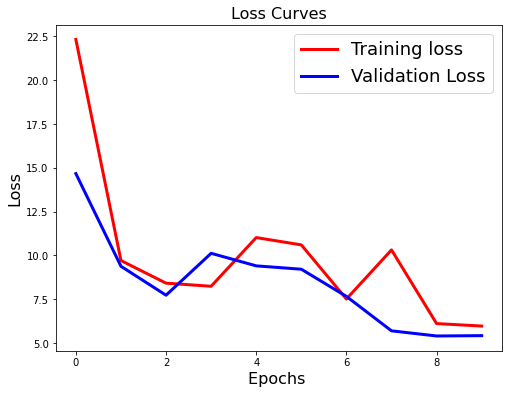

In [89]:
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  

Text(0.5, 1.0, 'Accuracy Curves')

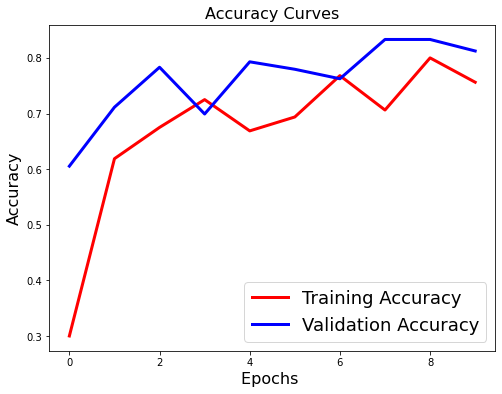

In [90]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [91]:
##################################################################################################
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [92]:
#Print the Target names

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Normalized confusion matrix


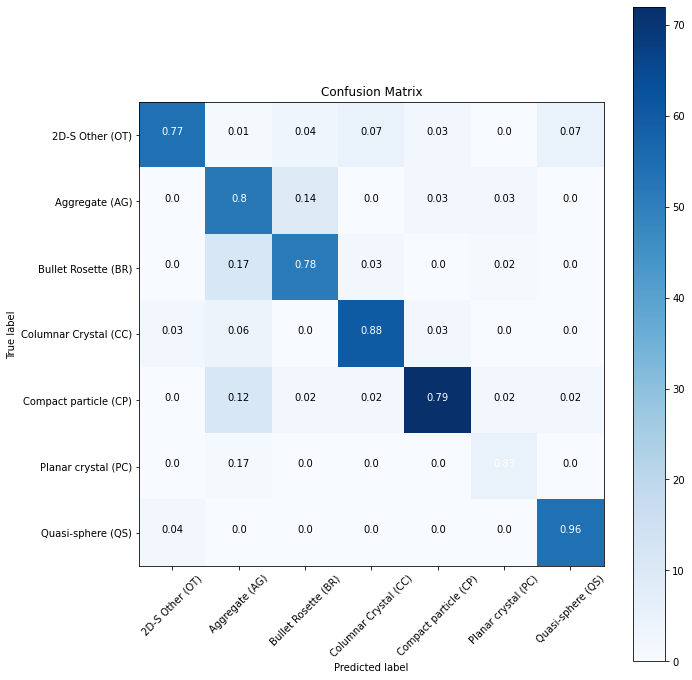

In [93]:
#Confution Matrix 

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [94]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       0.93      0.77      0.84        70
       Aggregate (AG)       0.65      0.80      0.72        65
  Bullet Rosette (BR)       0.78      0.78      0.78        65
Columnar Crystal (CC)       0.87      0.88      0.88        68
Compact particle (CP)       0.92      0.79      0.85        91
  Planar crystal (PC)       0.50      0.83      0.62         6
    Quasi-sphere (QS)       0.89      0.96      0.92        56

             accuracy                           0.83       421
            macro avg       0.79      0.83      0.80       421
         weighted avg       0.84      0.83      0.83       421



In [95]:
#Save the model
model.save("vgg192DS.hdf5")


3)ResNet50

In [96]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [97]:
# Import the restnet50 library as shown below and add preprocessing layer to the front of restnet
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [98]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [99]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [101]:
prediction = Dense(7, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [102]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [103]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [104]:
#Train the model
history = model.fit_generator(train_generator, steps_per_epoch=5, validation_data=valid_generator, validation_steps=4, epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
5/5 [==============================] - 15s 3s/step - loss: 16.1754 - accuracy: 0.2438 - val_loss: 5.6842 - val_accuracy: 0.6821
Epoch 2/10
5/5 [==============================] - 5s 1s/step - loss: 7.6668 - accuracy: 0.5500 - val_loss: 10.0087 - val_accuracy: 0.6516
Epoch 3/10
5/5 [==============================] - 5s 1s/step - loss: 6.9489 - accuracy: 0.6750 - val_loss: 6.9944 - val_accuracy: 0.7345
Epoch 4/10
5/5 [==============================] - 5s 1s/step - loss: 8.8473 - accuracy: 0.6938 - val_loss: 6.7167 - val_accuracy: 0.7406
Epoch 5/10
5/5 [==============================] - 7s 2s/step - loss: 6.0396 - accuracy: 0.7000 - val_loss: 5.0238 - val_accuracy: 0.7808
Epoch 6/10
5/5 [==============================] - 5s 1s/step - loss: 3.7933 - accuracy: 0.7937 - val_loss: 4.6209 - val_accuracy: 0.8076
Epoch 7/10
5/5 [==============================] - 5s 1s/step - loss: 3.8730 - accuracy: 0.8188 - val_loss: 4.0894 - val_accuracy: 0.7637
Epoch 8/10
5/5 [======================

In [105]:
#Get the accuracy score
test_score = model.evaluate_generator(test_generator, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 80.52%
[INFO] Loss:  2.8501367568969727


Text(0.5, 1.0, 'Loss Curves')

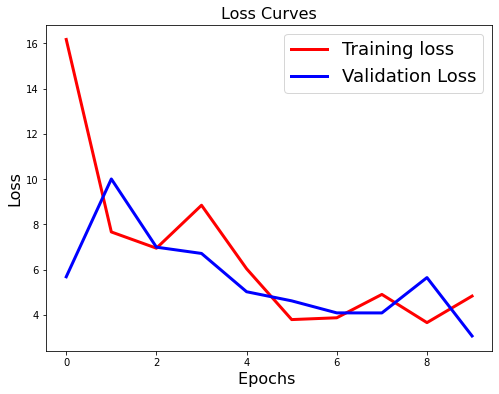

In [106]:
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  

Text(0.5, 1.0, 'Accuracy Curves')

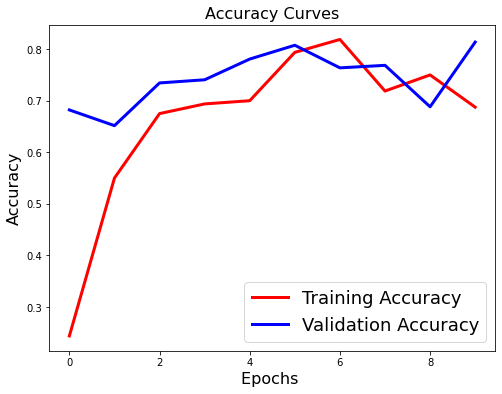

In [107]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


In [108]:
##################################################################################################
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [109]:
#Print the Target names

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)

In [ ]:
#Confution Matrix 

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


In [112]:
#Save the model
model.save("reset2DS.hdf5")


Inception V3

In [125]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (180, 180, 3), include_top = False, weights = 'imagenet')


In [126]:
for layer in base_model.layers:
    layer.trainable = False

In [127]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='softmax')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(7, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)


In [128]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [132]:
#Train the model
history = model.fit_generator(train_generator, steps_per_epoch=20, validation_data=valid_generator, validation_steps=4, epochs=25)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25


InvalidArgumentError: ignored

In [133]:
#Get the accuracy score
test_score = model.evaluate_generator(test_generator, 32)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


InvalidArgumentError: ignored

In [ ]:
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


In [ ]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
#Print the Target names

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)

In [ ]:
#Confution Matrix 

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


In [ ]:
#Save the model
model.save("inception2DS.hdf5")

EfficientNet

In [134]:
!pip install efficientnet==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.5 MB/s 


In [135]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow import keras
# import the tensorflow.keras version of efficientnet
from efficientnet import tfkeras as efficientnet
import matplotlib.pyplot as plt

In [136]:
def get_model(input_shape, num_classes):
    base_model = efficientnet.EfficientNetB4(
        weights='noisy-student',
        pooling='avg',
        include_top=False,
        input_shape=input_shape
    )
    
    # "Freeze" the base_model layers so that we don't backpropagate through them.
    # This effectively makes base_model a feature extractor.
    for layer in base_model.layers:
        layer.trainable = False

    # Create our own fully-conected top layer with num_classes outputs that takes base_model.output as an input.
    # We use the 'softmax' activation for computing class probabilities.
    x = base_model.output
    predictions = keras.layers.Dense(7, activation='softmax')(x)

    # the Model class packages our architecture into one object
    model = keras.models.Model(inputs=base_model.input, outputs=predictions)
    return model

In [137]:
model = get_model(input_shape=(150, 150, 3), num_classes=7)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

71688192/71678424 [==============================] - 2s 0us/step


In [138]:
#Train the model
history = model.fit_generator(train_generator, steps_per_epoch=20, validation_data=valid_generator, validation_steps=4, epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 35s 1s/step - loss: 114885.8984 - accuracy: 0.1906 - val_loss: 24618.6387 - val_accuracy: 0.1657
Epoch 2/25
20/20 [==============================] - 14s 704ms/step - loss: 168947.2500 - accuracy: 0.1469 - val_loss: 23967.7930 - val_accuracy: 0.1632
Epoch 3/25
20/20 [==============================] - 12s 597ms/step - loss: 167677.7188 - accuracy: 0.1344 - val_loss: 21879.4023 - val_accuracy: 0.1657
Epoch 4/25
20/20 [==============================] - 16s 819ms/step - loss: 114868.3594 - accuracy: 0.1391 - val_loss: 22847.5879 - val_accuracy: 0.1620
Epoch 5/25
20/20 [==============================] - 11s 561ms/step - loss: 130045.4609 - accuracy: 0.1688 - val_loss: 23274.9043 - val_accuracy: 0.1730
Epoch 6/25
20/20 [==============================] - 12s 586ms/step - loss: 129918.4609 - accuracy: 0.1500 - val_loss: 23348.5234 - val_accuracy: 0.1730
Epoch 7/25
20/20 [==============================] - 12s 603ms/step - loss: 130819.2500 - ac

In [139]:
#Get the accuracy score
test_score = model.evaluate_generator(test_generator, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 17.10%
[INFO] Loss:  32934.359375


Text(0.5, 1.0, 'Loss Curves')

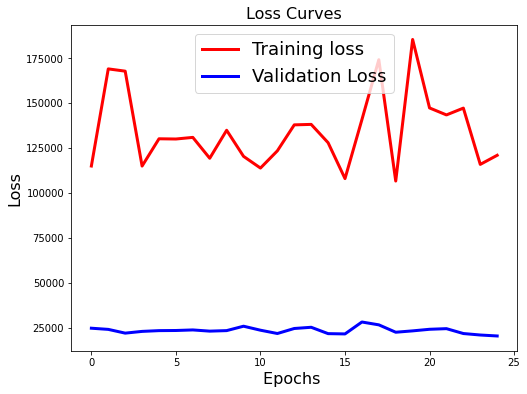

In [140]:
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  

Text(0.5, 1.0, 'Accuracy Curves')

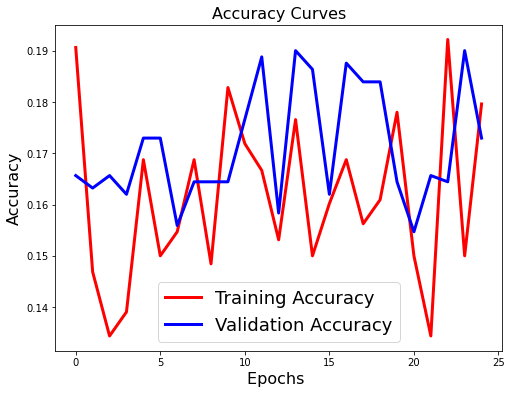

In [141]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [142]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [143]:
#Print the Target names

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Normalized confusion matrix


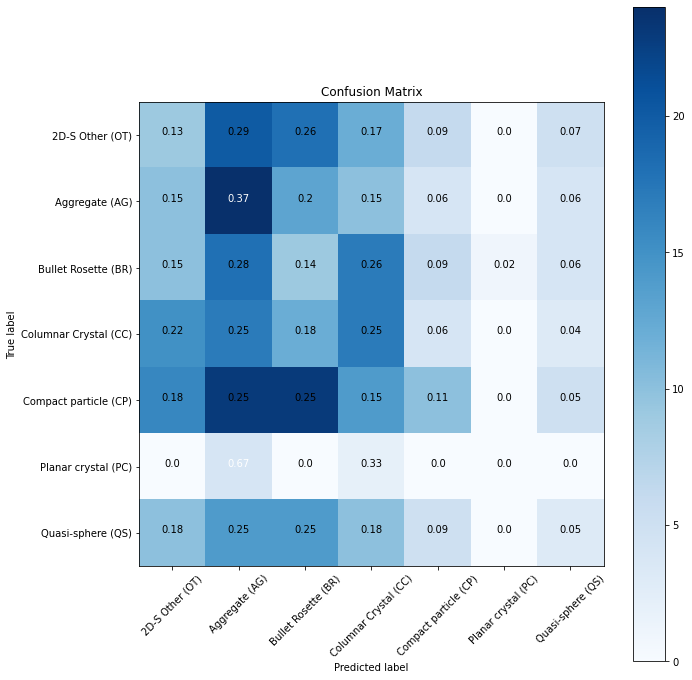

In [144]:
#Confution Matrix 

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [145]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       0.13      0.13      0.13        70
       Aggregate (AG)       0.20      0.37      0.26        65
  Bullet Rosette (BR)       0.10      0.14      0.12        65
Columnar Crystal (CC)       0.21      0.25      0.23        68
Compact particle (CP)       0.29      0.11      0.16        91
  Planar crystal (PC)       0.00      0.00      0.00         6
    Quasi-sphere (QS)       0.12      0.05      0.07        56

             accuracy                           0.17       421
            macro avg       0.15      0.15      0.14       421
         weighted avg       0.18      0.17      0.16       421



In [146]:
#Save the model
model.save("efficitent2DS.hdf5")


Mobilenet

In [147]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
#from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
#from keras.optimizers import Adam

In [148]:
mobile = keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [149]:
def prepare_image(file):
    img_path = '/content/airlab/2DS_rospla'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [150]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(7,activation='softmax')(x) #final layer with softmax activation

17235968/17225924 [==============================] - 0s 0us/step


In [151]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [152]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_8
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [153]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
#for layer in model.layers[:20]:
    #layer.trainable=False
#for layer in model.layers[20:]:
    #layer.trainable=True

In [154]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy


In [155]:
#Train the model
history = model.fit_generator(train_generator, steps_per_epoch=20, validation_data=valid_generator, validation_steps=4, epochs=25)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 14s 624ms/step - loss: 1.9543 - accuracy: 0.1359 - val_loss: 1.9352 - val_accuracy: 0.1291
Epoch 2/25
20/20 [==============================] - 9s 465ms/step - loss: 1.9148 - accuracy: 0.1609 - val_loss: 1.9352 - val_accuracy: 0.1291
Epoch 3/25
20/20 [==============================] - 8s 385ms/step - loss: 1.9315 - accuracy: 0.1469 - val_loss: 1.9352 - val_accuracy: 0.1291
Epoch 4/25
20/20 [==============================] - 9s 452ms/step - loss: 1.9431 - accuracy: 0.1562 - val_loss: 1.9352 - val_accuracy: 0.1291
Epoch 5/25
20/20 [==============================] - 8s 389ms/step - loss: 1.9250 - accuracy: 0.1484 - val_loss: 1.9352 - val_accuracy: 0.1291
Epoch 6/25
20/20 [==============================] - 8s 383ms/step - loss: 1.9477 - accuracy: 0.1234 - val_loss: 1.9352 - val_accuracy: 0.1291
Epoch 7/25
20/20 [==============================] - 8s 381ms/step - loss: 1.9399 - accuracy: 0.1618 - val_loss: 1.9352 - val_accuracy: 0.1291
Epoch

In [156]:
#Get the accuracy score
test_score = model.evaluate_generator(test_generator, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 12.83%
[INFO] Loss:  1.94580078125


Text(0.5, 1.0, 'Loss Curves')

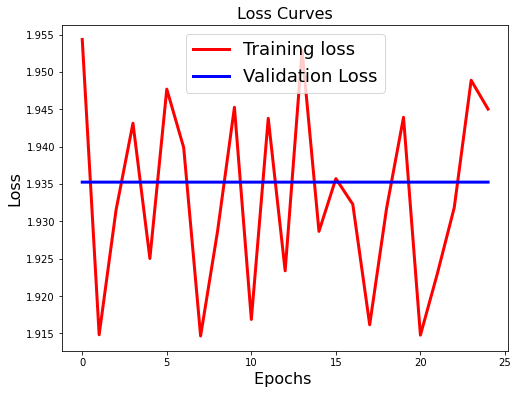

In [157]:
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  

Text(0.5, 1.0, 'Accuracy Curves')

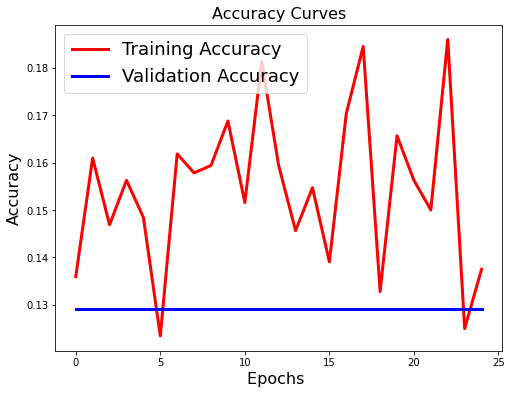

In [158]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [159]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [160]:
#Print the Target names

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Normalized confusion matrix


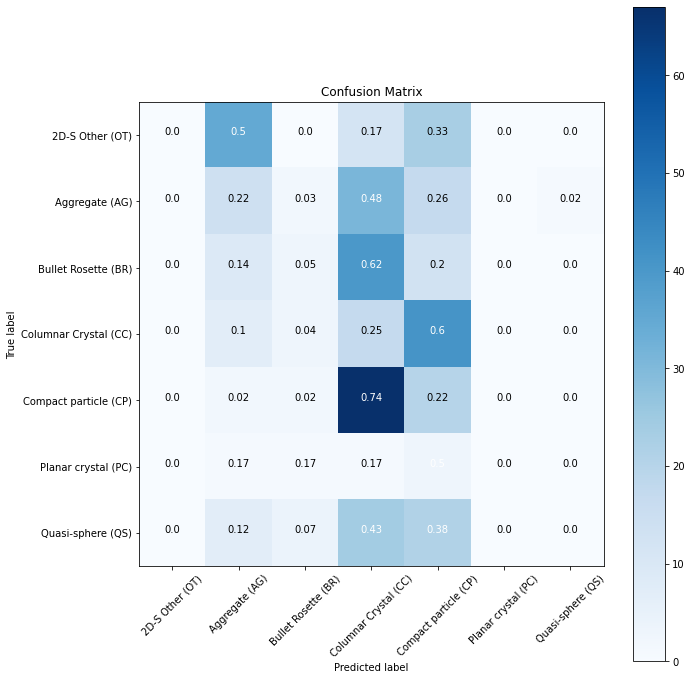

In [161]:
#Confution Matrix 

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [162]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       0.00      0.00      0.00        70
       Aggregate (AG)       0.19      0.22      0.20        65
  Bullet Rosette (BR)       0.20      0.05      0.07        65
Columnar Crystal (CC)       0.09      0.25      0.13        68
Compact particle (CP)       0.14      0.22      0.17        91
  Planar crystal (PC)       0.00      0.00      0.00         6
    Quasi-sphere (QS)       0.00      0.00      0.00        56

             accuracy                           0.13       421
            macro avg       0.09      0.10      0.08       421
         weighted avg       0.11      0.13      0.10       421



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
#Save the model
model.save("mobile2DS.hdf5")
